# Project Business Statistics: E-news Express


## Description
### Background: 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

### Objective:

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Do the users spend more time on the new landing page than the old landing page?
3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
5. Is the mean time spent on the new page same for the different language users?
*Consider a significance level of 0.05 for all tests.

### Data Dictionary:

user_id - This represents the user ID of the person visiting the website.

group - This represents whether the user belongs to the first group (control) or the second group (treatment).

landing_page - This represents whether the landing page is new or old.

time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

converted - This represents whether the user gets converted to a subscriber of the news portal or not.

language_preferred - This represents the language chosen by the user to view the landing page.

### Import the required packages

In [78]:
import numpy as np #library used for working with arrays
import pandas as pd #library used for data manipulation and analysis 
import matplotlib.pyplot as plt #library for plots and visualisations
import seaborn as sns #library for visualisations
sns.set_theme(style="darkgrid")
%matplotlib inline 

import scipy.stats as stats #this library contains a large number of probability distributions and statistical functions

## 1. Explore the dataset and extract insights using Exploratory Data Analysis

### Understand the structure of data

In [79]:
#read the dataset 
df = pd.read_csv('abtest.csv')

#shows the first five rows of data
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [80]:
df.shape #outputs the dimensions of a dataset (rows by columns)

(100, 6)

#### Observations: 
The DataFrame has a total of 100 observations composed of 6 features describing each observation. 

In [81]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations: 
There are no missing values for any of the 100 observations and their related features.

In [82]:
df.info() #use info() to print a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations: 
There are a total of 100 entries/observations and 6 columns/features in the dataset. 

There is 3 different data types: 
1. int64(1)
    * user_id
2. float64(1)
    * time_spent_on_the_page
3. object(4)
    * group, landing_page, converted, language_preferred

A memory usage of 4.8+ KB.

In [83]:
#coverting "objects" to "category" reduces the data space required to store the dataframe
#converts 'group', 'landing_page', 'converted', 'language_preferred'b into categorical data

for col in ['group', 'landing_page', 'converted', 'language_preferred']:
    df[col] = df[col].astype('category')

# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Observations: 
Again there are still 100 entries/observations and 6 columns/features in the dataframe. 

The data types include: 
1. int64(1)
    * user_id
2. float64(1)
    * time_spent_on_the_page
3. categorical(4)
    * group, landing_page, converted, language_preferred

In converting 4 of the previous object features to categorical the memory usage now includes 2.6 KB.

In [84]:
df.describe() #outputs the summary statistics of the dataset

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Observations: 
1. A total of 100 entries are included in the dataset
2. The average "time spent on the page" is about 5.38 minutes
3. The standard deviation is about 2.38 minutes
4. Inter-quartile range includes:
    * Min = 0.19
    * 25% quartile = 3.88
    * 50% quartile = 5.42
    * 75% quartile = 7.02
    * Max = 10.71

In [85]:
df['group'].describe() #outputs the count, unique values, top value, frequency, and data type

count         100
unique          2
top       control
freq           50
Name: group, dtype: object

#### Observations: 
The feature "group" has 2 unique values control and treatment groups.

In [86]:
df['landing_page'].describe() #outputs the count, unique values, top value, frequency, and data type

count     100
unique      2
top       new
freq       50
Name: landing_page, dtype: object

#### Observations: 
The feature "landing page" also has 2 unique values old and new landing page.

In [87]:
df['converted'].describe() #outputs the count, unique values, top value, frequency, and data type

count     100
unique      2
top       yes
freq       54
Name: converted, dtype: object

#### Observations: 
The feature "converted" has 2 unique values no and yes, with yes(coverted) having the highest frequency of 54.

In [88]:
df['language_preferred'].describe() #outputs the count, unique values, top value, frequency, and data type

count        100
unique         3
top       French
freq          34
Name: language_preferred, dtype: object

In [89]:
df['language_preferred'].unique() #outputs the unique values (categpries) associated with the feature

['Spanish', 'English', 'French']
Categories (3, object): ['Spanish', 'English', 'French']

#### Observations: 
The feature "language preferred" has 3 unique values spanish, english, and french, with french having the highest frequency of 34. 

### Exploratory Data Analysis (EDA)
### Univariate Analysis 

In [90]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [91]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [92]:
def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on "group"

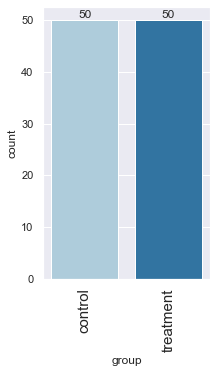

In [93]:
labeled_barplot(df, 'group')

In [94]:
df['group'].describe() #outputs the count, unique values, top value, frequency, and data type

count         100
unique          2
top       control
freq           50
Name: group, dtype: object

#### Observations: 
The feature "group" has 2 unique values control and treatment groups. The groups are split in half. 50 in the control group and 50 in the treatment group.

### Observations on "landing page"

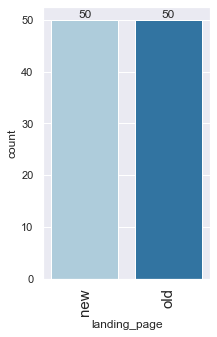

In [95]:
labeled_barplot(df, 'landing_page')

In [96]:
df['landing_page'].describe() #outputs the count, unique values, top value, frequency, and data type

count     100
unique      2
top       new
freq       50
Name: landing_page, dtype: object

#### Observations: 
The feature "landing page" also has 2 unique values old and new landing page. The data shows 50 observations for the old landing page and 50 observation for the new landing page.

### Observations on "time spent on the landing page"

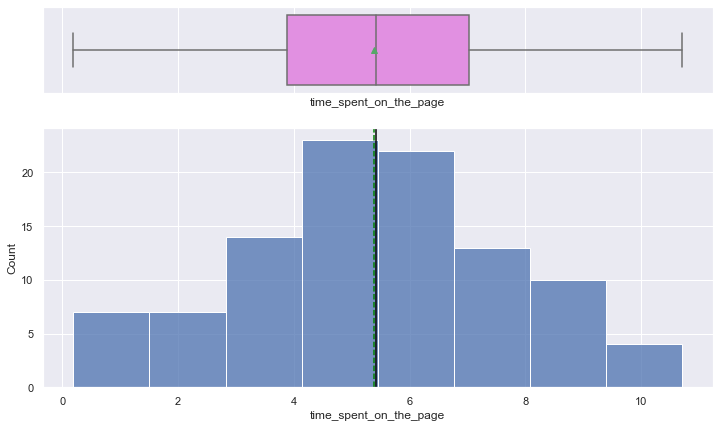

In [97]:
histogram_boxplot(df, 'time_spent_on_the_page')

#### Observations:
1. The average "time spent on the page" is about 5.38 minutes
2. The standard deviation is about 2.38 minutes
3. Inter-quartile range includes:
    * Min = 0.19
    * 25% quartile = 3.88
    * 50% quartile = 5.42
    * 75% quartile = 7.02
    * Max = 10.71
4. The data seems to follow a normal distribution as seen on the barplot/histogram

### Observations on "converted"

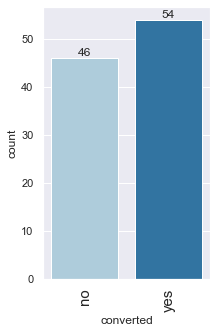

In [98]:
labeled_barplot(df, 'converted')

In [99]:
df['converted'].describe() #outputs the count, unique values, top value, frequency, and data type

count     100
unique      2
top       yes
freq       54
Name: converted, dtype: object

#### Observations: 
The feature "converted" has 2 unique values no and yes, with yes(coverted) having the highest frequency of 54 and no(converted) with 46.

### Observations on "language_preferred"

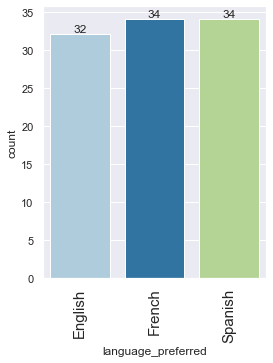

In [100]:
labeled_barplot(df, 'language_preferred')

In [101]:
df['language_preferred'].describe() #outputs the count, unique values, top value, frequency, and data type

count        100
unique         3
top       French
freq          34
Name: language_preferred, dtype: object

In [102]:
df['language_preferred'].unique() #outputs the unique values (categpries) associated with the feature

['Spanish', 'English', 'French']
Categories (3, object): ['Spanish', 'English', 'French']

In [103]:
df['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

#### Observations: 
The feature "language preferred" has 3 unique values spanish, english, and french, with both french and spanish having the highest frequencies of 34. 

### Bivariate Analysis

In [104]:
df.corr()

,user_id,time_spent_on_the_page
user_id,1.000000,-0.372868
time_spent_on_the_page,-0.372868,1.000000


<AxesSubplot:xlabel='group', ylabel='time_spent_on_the_page'>

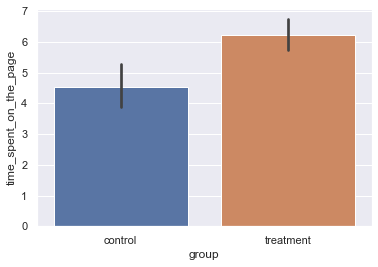

In [105]:
sns.barplot(data = df, x = 'group', y = 'time_spent_on_the_page')

In [106]:
df.groupby(['group'])['time_spent_on_the_page'].mean()

group
control      4.5324
treatment    6.2232
Name: time_spent_on_the_page, dtype: float64

#### Observations:
The treatment group(those exposed to the new landing page) are more likely to spend more time on the page.

<AxesSubplot:xlabel='landing_page', ylabel='time_spent_on_the_page'>

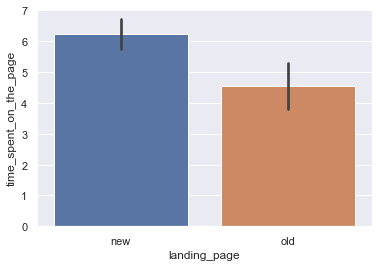

In [107]:
sns.barplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page')

In [108]:
df.groupby(['landing_page'])['time_spent_on_the_page'].mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

#### Observations:
The same observation from above applies to this one too. Users exposed to the new landing page spend more time on average than those on the old landing page.

<AxesSubplot:xlabel='converted', ylabel='time_spent_on_the_page'>

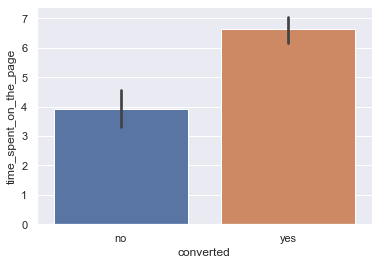

In [109]:
sns.barplot(data = df, x = 'converted', y = 'time_spent_on_the_page')

In [110]:
df.groupby(['converted'])['time_spent_on_the_page'].mean()

converted
no     3.915870
yes    6.623148
Name: time_spent_on_the_page, dtype: float64

#### Observations:
Users who converted demonstrate on average a higher time spent on the page.

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

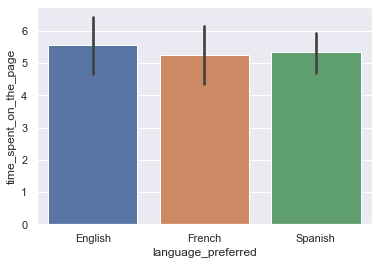

In [111]:
sns.barplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')

In [112]:
df.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    5.559063
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

#### Observations:
Amond the different languages English, French, and Spanish the average time spent on the page seems relatively the same.

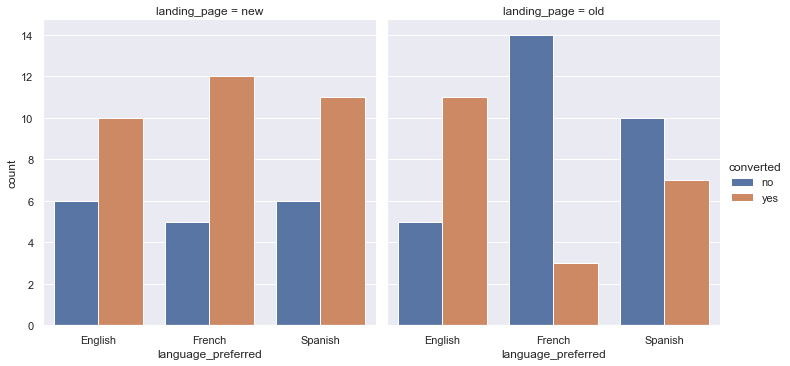

In [203]:
sns.catplot(data = df, x = 'language_preferred', hue = 'converted', col = 'landing_page', kind = 'count')

#### Observations:
French and Spanish speaking users are less likely to convert to the new landing page if first exposed to the old landing page. Whereas, if they are first exposed to the new landing page they are more likely to convert. 

<AxesSubplot:xlabel='landing_page', ylabel='time_spent_on_the_page'>

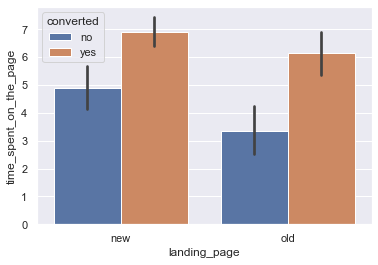

In [205]:
sns.barplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page', hue = 'converted')

#### Observations:
The graph demonstrates that more users are likely to convert to the new landing page despite whatever landing page they are first exposed to and those who do convert demonstrate higher time averages. 

### Hypothesis Testing
### 2. Do the users spend more time on the new landing page than the old landing page?

<AxesSubplot:xlabel='landing_page', ylabel='time_spent_on_the_page'>

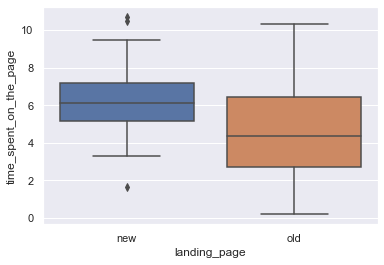

In [200]:
sns.boxplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page')

#### Observations:
On average users seem to spend more time on the new page than on the old page.

In [201]:
df.groupby(['landing_page'])['time_spent_on_the_page'].mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

#### Step 1: Define null and alternate hypotheses

$H_0:$ The mean time spent on the old landing page.

$H_a:$ The mean time spent on the new landing page.

Let $\mu_1, \mu_2$ be the mean time spent on the old landing page vs the mean time spent on the new landing page.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_1 = \mu_2 $

$H_a: \mu_1 < \mu_2 $

#### Step 2: Select Appropriate test

This is a case of a one-tailed two-sample mean test. As the two samples are not independent in this case, and also the population standard deviations are unknown, we shall use a paired t-test for this problem.

#### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha$ = 0.05.

#### Step 4: Calculate the p-value

scipy.stats.ttest_rel calculates the t-test on TWO RELATED samples of observations. This function returns the test statistic and p-value for a right-tailed t-test in case the alternative parameter is set to 'greater'.

In [141]:
mu1 = df[df['landing_page']=='old']['time_spent_on_the_page']
mu2 = df[df['landing_page']=='new']['time_spent_on_the_page']

In [142]:
# find the p-value
test_stat, p_value  = stats.ttest_rel(mu2, mu1, alternative = 'greater')  #Performing a paired t-test

print('The p-value is', p_value)

The p-value is 0.00029910900937037973


#### Step 5: Compare the p-value with $\alpha$

In [143]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.00029910900937037973 is less than the level of significance, we reject the null hypothesis.


#### Step 6: Draw Inference

At 5% significance level, we reject the null hypothesis. Hence we have enough statistical evidence to say that the new landing page encourages users to spend more time than on the old landing page.

#### What conclusion does the test lead to?

In this scenario, the p value is 0.0003 which is less than the 0.05. Hence, we reject the null hypothesis. 

This means that the new landing page encourages users to spend more time significantly.

### 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

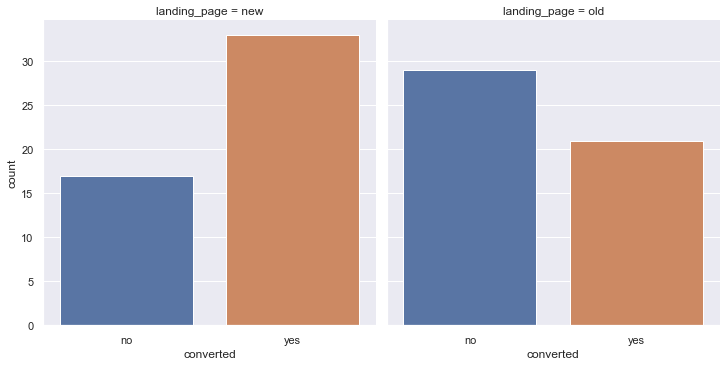

In [196]:
sns.catplot(data = df, x = 'converted', col = 'landing_page', kind = 'count')

#### Observation:
Users engaging with the new landing page are more likely to convert than those using the old landing page.

#### Let's write the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of converters in old landing page and new landing page respectively.

The company will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 \neq p_2$

In [148]:
#find the number of users who converted among both groups, old landing page and new landing page
df.groupby(['landing_page'])['converted'].value_counts()

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: converted, dtype: int64

In [149]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converters
converter_count = np.array([21, 33])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converter_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


#### Compare the p-value with $\alpha$

In [151]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


#### Step 6: Draw Inference

At 5% significance level, we reject the null hypothesis. Hence we have enough statistical evidence to say that the conversion rate among the two groups, old landing page and new landing page are different.

#### What conclusion does the test lead to?

In this scenario, the p value is 0.016 which is less than the 0.05. Hence, we reject the null hypothesis. 

This means that the conversion rate among the two groups, old landing page and new landing page are significantly different.

### 4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

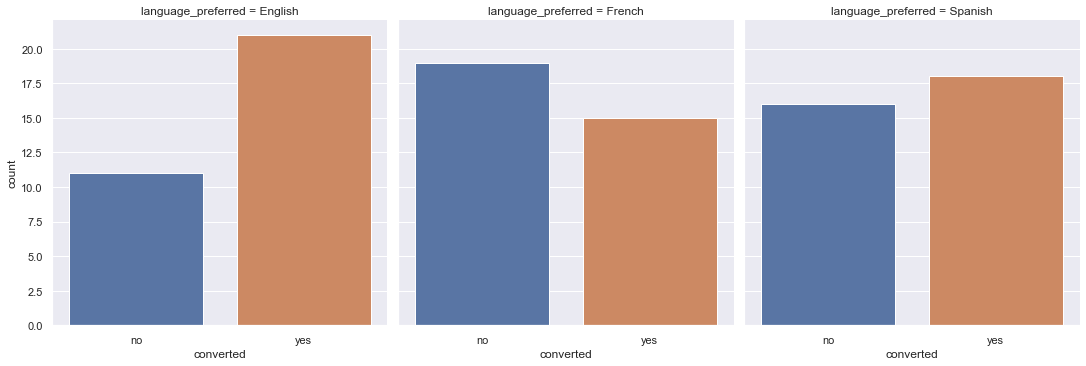

In [195]:
sns.catplot(data = df, x = 'converted', col = 'language_preferred', kind = 'count')

#### Observation:
The converted status doesn't seem to have much of an effect on French and Spanish speaking users, but does play more of a role with English speaking users.

In [162]:
df1 = df.drop(['group','user_id','time_spent_on_the_page','landing_page'], axis=1)
df1

,converted,language_preferred
0,no,Spanish
1,yes,English
2,no,Spanish
3,no,French
4,yes,Spanish
...,...,...
95,no,Spanish
96,yes,English
97,yes,Spanish
98,yes,Spanish


In [177]:
df2 = pd.crosstab(df1['converted'], df1['language_preferred'])
df2

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


#### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Converted status is independent of language preferred.

against the alternate hypothesis

>$H_a:$ Converted status depends on language preferred.

In [173]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(df2)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


#### Compare the p-value with $\alpha$

In [178]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


#### Step 6: Draw Inference

At 5% significance level, we fail to reject the null hypothesis. Hence we don't have enough statistical evidence to say that converted status depends on language preferrence.

#### What conclusion does the test lead to?

In this scenario, the p value is 0.213 which is greater than the 0.05. Hence, we fail to reject the null hypothesis. 

This means that the converted status is independent of language preferred.

### 5. Is the mean time spent on the new page same for the different language users?

In [189]:
df1 = df.loc[df['landing_page'] == 'new']
df1

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French
12,546491,treatment,new,5.86,yes,Spanish
13,546478,treatment,new,6.03,yes,French
15,546466,treatment,new,6.27,yes,Spanish
16,546443,treatment,new,8.73,no,English
22,546450,treatment,new,3.65,no,English


In [190]:
df1.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

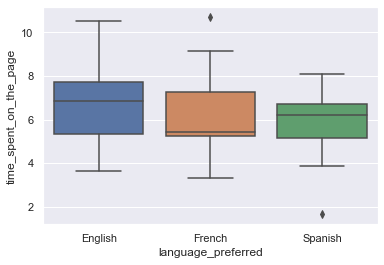

In [191]:
sns.boxplot(data = df1, x = 'language_preferred', y = 'time_spent_on_the_page')

#### Observation:
The average time spent on the pages seems relatively the same among the different language preferences.

#### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new landing page for language preferences English, Spanish and French respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one time average of the new landing page is different among the language preferences.


In [193]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df1.loc[df1['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df1.loc[df1['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              df1.loc[df1['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


#### Compare the p-value with $\alpha$

In [188]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


#### Step 6: Draw Inference

At 5% significance level, we fail to reject the null hypothesis. Hence we don't have enough statistical evidence to say that at least one time average on the new landing page is different among the language preferences.

#### What conclusion does the test lead to?

In this scenario, the p value is 0.432 which is greater than the 0.05. Hence, we fail to reject the null hypothesis. 

This means that the time averages on the new landing page for the different languages are relatively the same.